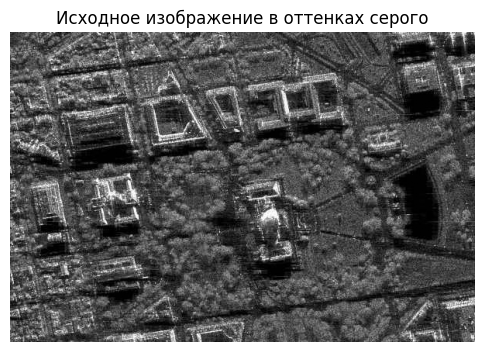

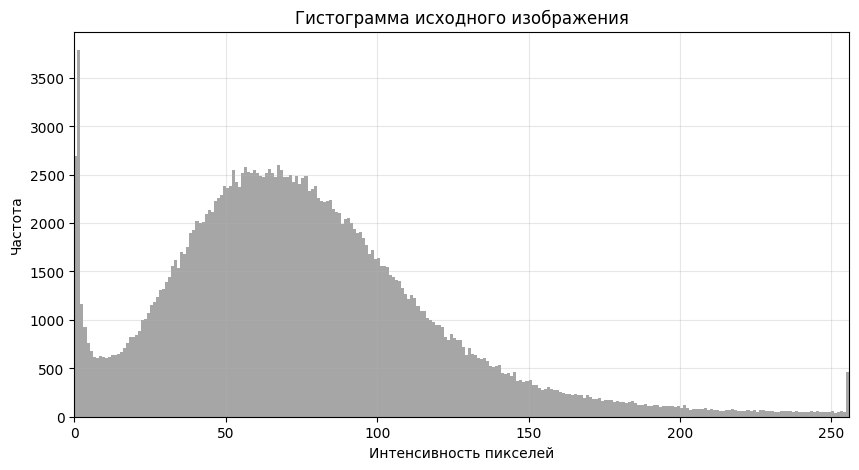

АНАЛИЗ ГАММА-КОРРЕКЦИИ


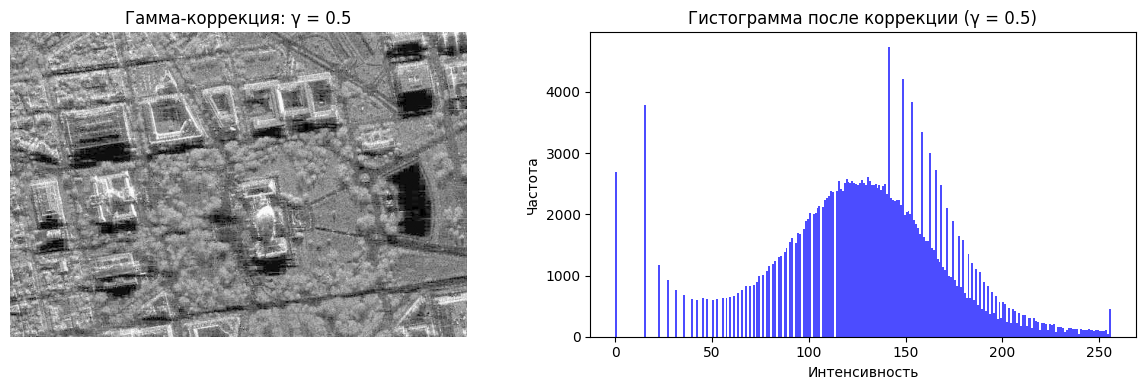

γ = 0.5: MSE = 3250.43, SSIM = 0.7875


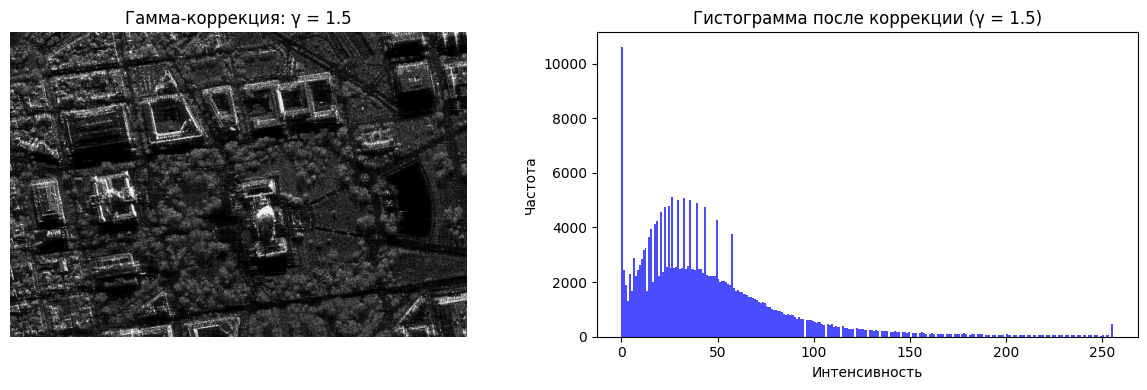

γ = 1.5: MSE = 971.82, SSIM = 0.8066


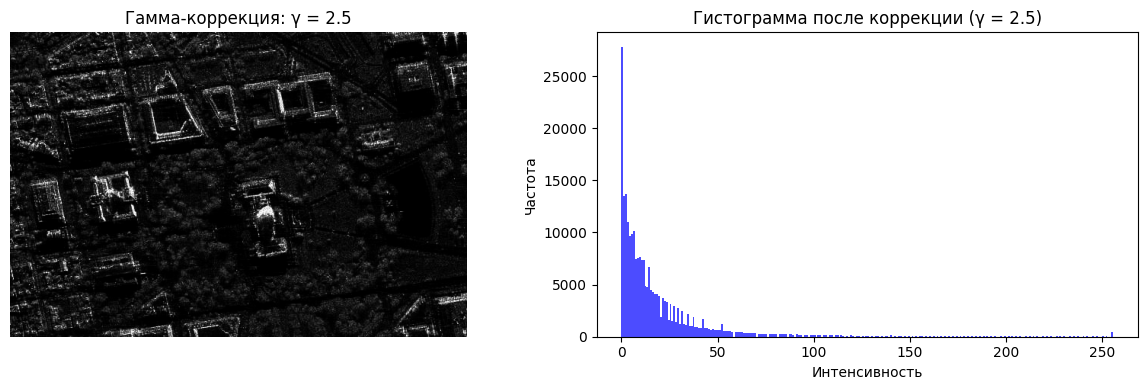

γ = 2.5: MSE = 3556.52, SSIM = 0.3285
СТАТИСТИЧЕСКАЯ ЦВЕТОКОРРЕКЦИЯ


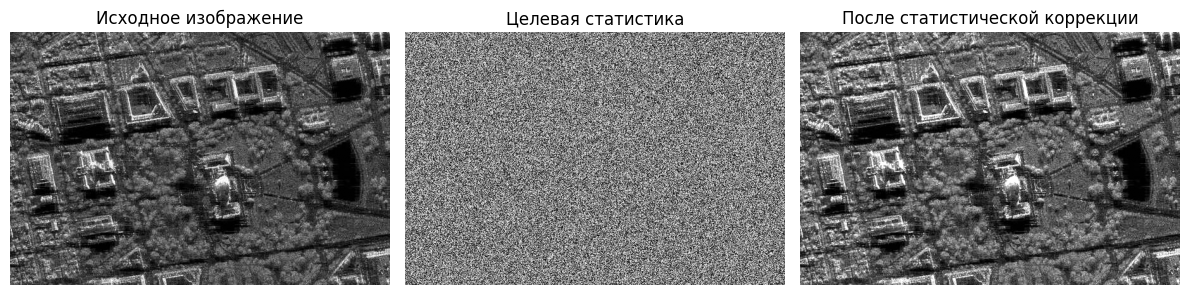

Статистическая коррекция: MSE = 2382.36, SSIM = 0.8371
ПОРОГОВАЯ ФИЛЬТРАЦИЯ
Порог 50: 70.5% белых пикселей
Порог 100: 23.2% белых пикселей
Порог 150: 5.5% белых пикселей
Порог 200: 1.6% белых пикселей


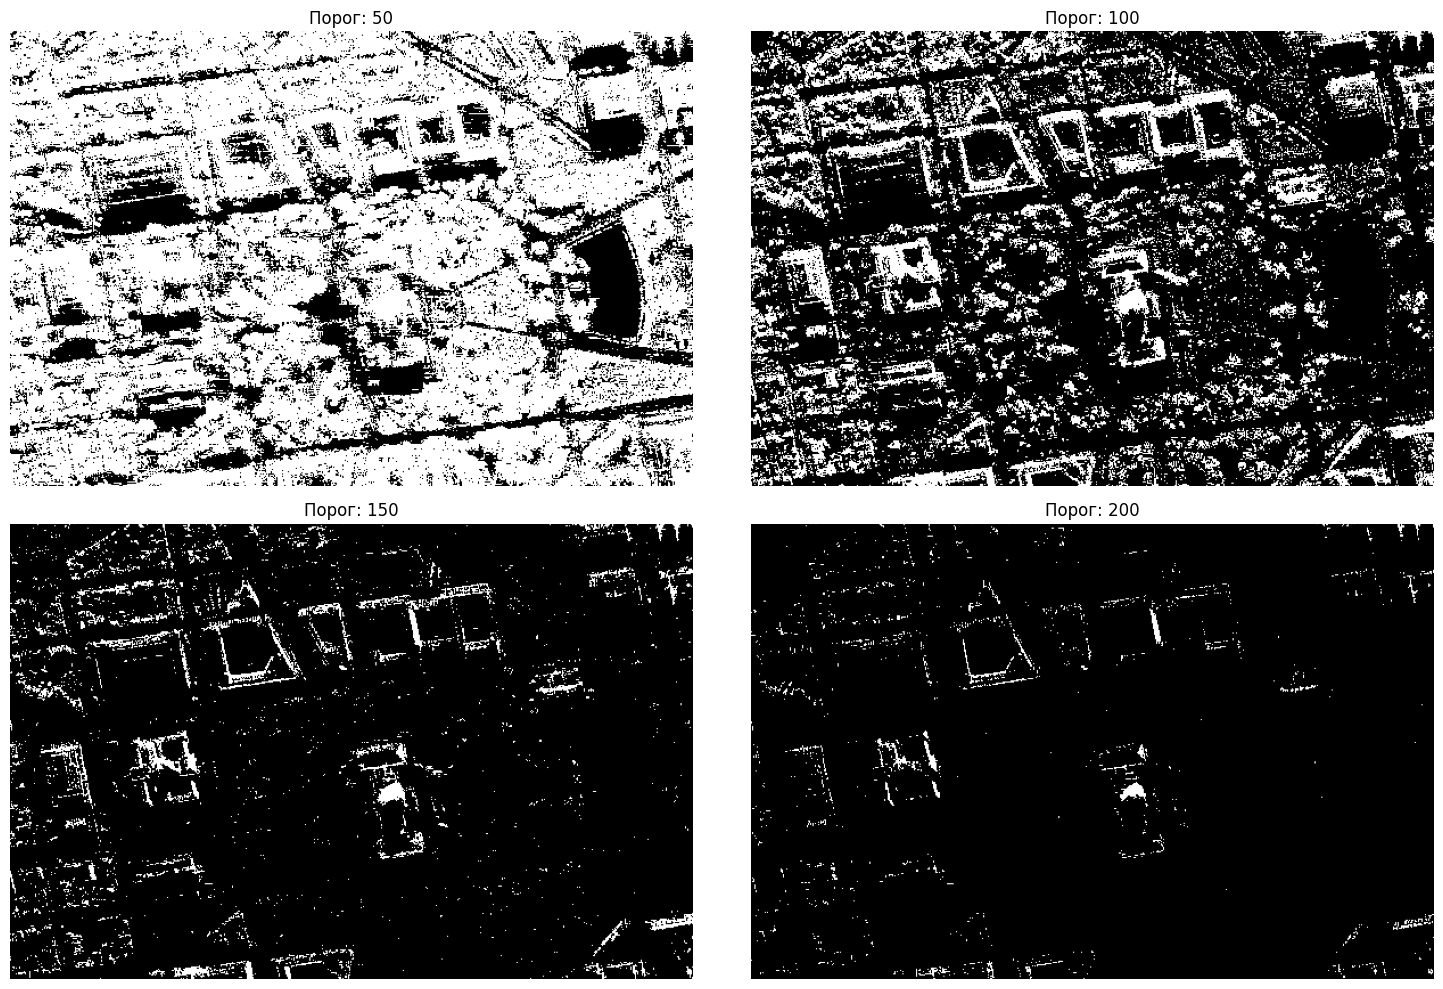

СВОДКА РЕЗУЛЬТАТОВ
Метод			MSE		SSIM
Гамма γ=0.5		3250.43		0.7875
Гамма γ=1.5		971.82		0.8066
Гамма γ=2.5		3556.52		0.3285
Стат. коррекция	2382.36		0.8371


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def gamma_correction(image, gamma):
    normalized_image = image / 255.0
    corrected_image = np.power(normalized_image, gamma)
    corrected_image = np.uint8(corrected_image * 255)
    return corrected_image

def calculate_mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def compare_images(original, corrected):
    mse_value = calculate_mse(original, corrected)
    ssim_value = ssim(original, corrected)
    return mse_value, ssim_value

def statistical_color_correction_gray(source_image, target_stats_image):
    """
    Статистическая цветокоррекция для серых изображений
    на основе статистики целевого изображения
    """
    # Вычисляем статистику исходного и целевого изображений
    source_mean = np.mean(source_image)
    source_std = np.std(source_image)
    target_mean = np.mean(target_stats_image)
    target_std = np.std(target_stats_image)
    
    # Применяем статистическое преобразование
    corrected = (source_image - source_mean) * (target_std / source_std) + target_mean
    
    # Обрезаем значения до допустимого диапазона
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)
    
    return corrected

def threshold_filtering(image, threshold):
    _, thresholded_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return thresholded_image

# Загрузка изображения
image_path = 'sar_1_gray.jpg'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Загружаем сразу как серое

if image is None:
    print("Ошибка: не удалось загрузить изображение")
    exit()

# 1. Отображение исходного изображения
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение в оттенках серого')
plt.axis('off')
plt.show()

# 2. Построение гистограммы
plt.figure(figsize=(10, 5))
plt.hist(image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Гистограмма исходного изображения')
plt.xlabel('Интенсивность пикселей')
plt.ylabel('Частота')
plt.xlim([0, 256])
plt.grid(alpha=0.3)
plt.show()

print("АНАЛИЗ ГАММА-КОРРЕКЦИИ")

# 3. Гамма-коррекция
gamma_values = [0.5, 1.5, 2.5]  # Более выраженные значения для демонстрации

for gamma in gamma_values:
    corrected_image = gamma_correction(image, gamma)
    
    # Визуализация
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    plt.imshow(corrected_image, cmap='gray')
    plt.title(f'Гамма-коррекция: γ = {gamma}')
    plt.axis('off')
    
    plt.subplot(122)
    plt.hist(corrected_image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.title(f'Гистограмма после коррекции (γ = {gamma})')
    plt.xlabel('Интенсивность')
    plt.ylabel('Частота')
    
    plt.tight_layout()
    plt.show()
    
    # Сравнение
    mse_value, ssim_value = compare_images(image, corrected_image)
    print(f'γ = {gamma}: MSE = {mse_value:.2f}, SSIM = {ssim_value:.4f}')

# 4. Статистическая цветокоррекция

print("СТАТИСТИЧЕСКАЯ ЦВЕТОКОРРЕКЦИЯ")


# Создаем целевое изображение с нужной статистикой (пример - равномерное распределение)
target_stats = np.random.uniform(50, 200, image.shape).astype(np.uint8)

statistical_corrected = statistical_color_correction_gray(image, target_stats)

# Визуализация
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(132)
plt.imshow(target_stats, cmap='gray')
plt.title('Целевая статистика')
plt.axis('off')

plt.subplot(133)
plt.imshow(statistical_corrected, cmap='gray')
plt.title('После статистической коррекции')
plt.axis('off')

plt.tight_layout()
plt.show()

mse_stat, ssim_stat = compare_images(image, statistical_corrected)
print(f'Статистическая коррекция: MSE = {mse_stat:.2f}, SSIM = {ssim_stat:.4f}')

# 5. Пороговая фильтрация
print("ПОРОГОВАЯ ФИЛЬТРАЦИЯ")


thresholds = [50, 100, 150, 200]  # Разные пороги

plt.figure(figsize=(15, 10))

for i, threshold in enumerate(thresholds, 1):
    thresholded_image = threshold_filtering(image, threshold)
    
    plt.subplot(2, 2, i)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'Порог: {threshold}')
    plt.axis('off')
    
    # Анализ результатов
    unique, counts = np.unique(thresholded_image, return_counts=True)
    white_pixels = counts[1] if len(counts) > 1 else 0
    white_percentage = (white_pixels / thresholded_image.size) * 100
    
    print(f'Порог {threshold}: {white_percentage:.1f}% белых пикселей')

plt.tight_layout()
plt.show()

# Сводная таблица результатов
print("СВОДКА РЕЗУЛЬТАТОВ")
print("Метод\t\t\tMSE\t\tSSIM")


for gamma in gamma_values:
    corrected = gamma_correction(image, gamma)
    mse, ssim_val = compare_images(image, corrected)
    print(f"Гамма γ={gamma}\t\t{mse:.2f}\t\t{ssim_val:.4f}")

print(f"Стат. коррекция\t{mse_stat:.2f}\t\t{ssim_stat:.4f}")